In [1]:
# Import Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
from scipy import stats
from datetime import datetime
ConsumerKey = "FfpVXRJNcDGT1lwco9DUykuRK"
ConsumerSecret = "mRb9EdLNlXAMUgzOp84pL6yGxu7SAi1G7QDH7S3A1JBuCmYZBa"
AccessToken = "500170090-hRWfTg7QqeIhidbIVQUkA98FMf46eWiNJGFXeLBY"
AccessTokenSecret = "NbRJU0itAtxxXS0x5ZvL3xbE8bnPLfWpmCh7ES2qGwN5o"
#from config import ConsumerKey, ConsumerSecret, AccessToken, AccessTokenSecret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Load CSV
csv_path = "all_movie_data.csv"

# Read school_data with Pandas
movie_data_df = pd.read_csv(csv_path, low_memory = False)
movie_data_df.head()

,title,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
0,#Jìyìdàshi,Thriller/Suspense,20170428,R,0.0,20000000,224942,587470,43326383,0.011247,-2.898676,-0.523861,-0.581893,-4.552582,NaN,0
1,#TylerPerrysBoo2AMadeaHalloween,Comedy,20171020,PG-13,0.0,20000000,21226953,47319572,47879572,1.061348,-2.898676,-0.523861,0.033620,-0.171252,NaN,0
2,#Gongfuyujia,Action,20170127,PG,0.0,65000000,111979,362657,254569616,0.001723,-2.898676,0.237328,-0.585204,-3.826587,NaN,0
3,#TheEmojiMovie,Adventure,20170728,PG,17.0,50000000,24531923,86089513,216807482,0.490638,-2.055653,-0.016401,0.130480,-0.339178,0.013807,46
4,#JustGettingStarted,Comedy,20171208,PG-13,22.0,22000000,3201459,6069605,6709821,0.145521,-1.807705,-0.490030,-0.494660,-2.850492,0.253185,100


In [3]:
# Use Seaborn library to set the size and look of the plot
sns.set_style("dark", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,5)})

# locating tweet count>10
movie_data_tc10_df = movie_data_df.loc[(movie_data_df['tweet_count']>10)]
movie_data_tc10_df.head()

,title,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
3,#TheEmojiMovie,Adventure,20170728,PG,17.00,50000000,24531923,86089513,216807482,0.490638,-2.055653,-0.016401,0.130480,-0.339178,0.013807,46
4,#JustGettingStarted,Comedy,20171208,PG-13,22.00,22000000,3201459,6069605,6709821,0.145521,-1.807705,-0.490030,-0.494660,-2.850492,0.253185,100
5,#Rings,Horror,20170203,PG-13,25.67,25000000,13002632,27793018,82991460,0.520105,-1.625711,-0.439284,-0.207413,-0.919505,0.182646,96
6,#TheSnowman,Thriller/Suspense,20171020,R,27.00,35000000,3372565,6670765,43232849,0.096359,-1.559757,-0.270131,-0.489645,-2.520101,0.192430,100
7,#Geostorm,Action,20171020,PG-13,29.33,100000000,13707376,33700160,220800160,0.137074,-1.444214,0.829364,-0.186759,-0.577146,-0.024243,100


In [4]:
# set value in release date to yyyy/mm
for index,row in movie_data_tc10_df.iterrows():
    date =str(row['release'])
    year = date[:4]
    month = date[4:6]
    year_month = str(year) + str(month)
    
    #print(month)
    movie_data_tc10_df.set_value(index,'release', str(year_month))
    #movie_data_tc10_df['release'].apply(lambda year_month: datetime.strptime(str(year_month),'%Y%m'))
movie_data_tc10_df.head()

,title,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
3,#TheEmojiMovie,Adventure,201707,PG,17.00,50000000,24531923,86089513,216807482,0.490638,-2.055653,-0.016401,0.130480,-0.339178,0.013807,46
4,#JustGettingStarted,Comedy,201712,PG-13,22.00,22000000,3201459,6069605,6709821,0.145521,-1.807705,-0.490030,-0.494660,-2.850492,0.253185,100
5,#Rings,Horror,201702,PG-13,25.67,25000000,13002632,27793018,82991460,0.520105,-1.625711,-0.439284,-0.207413,-0.919505,0.182646,96
6,#TheSnowman,Thriller/Suspense,201710,R,27.00,35000000,3372565,6670765,43232849,0.096359,-1.559757,-0.270131,-0.489645,-2.520101,0.192430,100
7,#Geostorm,Action,201710,PG-13,29.33,100000000,13707376,33700160,220800160,0.137074,-1.444214,0.829364,-0.186759,-0.577146,-0.024243,100


In [5]:
# y-axis for the plot (opening weekend revenue)
opening_weekend_rev = movie_data_tc10_df.groupby(movie_data_tc10_df["release"])["opening"].sum()
opening_weekend_rev_df = pd.DataFrame(opening_weekend_rev)
opening_weekend_rev_df = opening_weekend_rev.reset_index()
opening_weekend_rev_df.rename(columns={"opening": "total opening by month"}, inplace=True)
opening_weekend_rev_df["release"] = opening_weekend_rev_df["release"].astype(str)
#print(opening_weekend_rev_df.dtypes)
opening_weekend_rev_df

,release,total opening by month
0,201701,54554336
1,201702,183295480
2,201703,473270053
3,201704,129628762
4,201705,232444234
5,201706,371123221
6,201707,320868103
7,201708,99337301
8,201709,240065311
9,201710,105799291


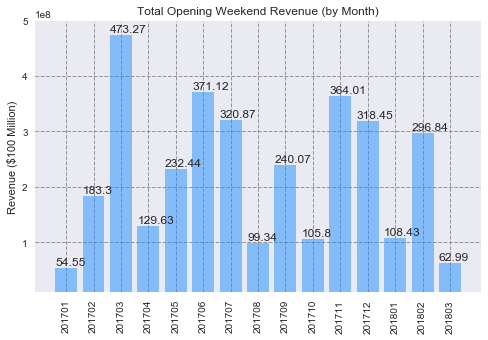

In [6]:
# y-axis for the plot (opening revenue)
opening_weekend_rev_y = opening_weekend_rev_df["total opening by month"]

# x-axis for the plot (release data)
date_open_x = opening_weekend_rev_df["release"]

# plot the barplot
bar_plot = plt.bar(date_open_x, opening_weekend_rev_y, alpha=0.5, align="edge", color="dodgerblue")
# (Or) using seaborn

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = np.arange(len(opening_weekend_rev_df))
plt.xticks(tick_locations+0.4, opening_weekend_rev_df["release"], rotation="vertical")

# Add values above the two bar graphs
count = 0
for rev in opening_weekend_rev_y:
    plt.text(count, rev+5000000, str(round(rev/1000000,2)))
    count = count + 1

# set the x and y axis limits and labels, chart title and legends 
plt.ylim(10000000, 500000000)
plt.title("Total Opening Weekend Revenue (by Month)")
plt.ylabel("Revenue ($100 Million)")
plt.grid(linestyle='--', color='grey', alpha=0.8)
plt.axhline(0)

# Save our graph and show the graph
plt.savefig('rev.jpg')
plt.show()


C:\Users\Samsung\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


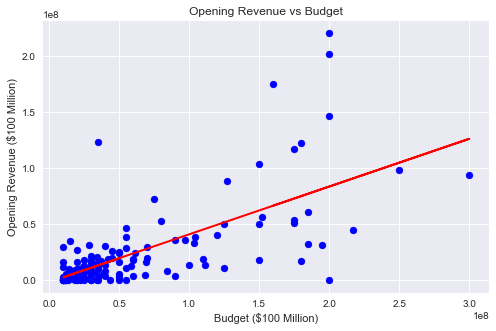

In [7]:
plt.scatter(movie_data_tc10_df["budget"], movie_data_tc10_df["opening"], marker ='o', color='blue', label="@bbc")

# Create trendline
rb = plt.subplot()
(rb_slope, rb_intercept, _, _, _) = stats.linregress(movie_data_tc10_df["budget"], movie_data_tc10_df["opening"])
rb_fit = (rb_slope * movie_data_tc10_df["budget"]) + rb_intercept
rb.plot(movie_data_tc10_df["budget"], rb_fit, color = "r", linewidth = 2)
rb_df = pd.DataFrame({"slope":[rb_slope], "intercept":[rb_intercept]})

plt.title("Opening Revenue vs Budget")
plt.xlabel("Budget ($100 Million)")
plt.ylabel("Opening Revenue ($100 Million)")

plt.savefig('RevvsBudget.jpg')
plt.show()